# Exploratory Data Analysis

In [2]:
#importing libraries
import ast
import pandas as pd 
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt 

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply([lambda x: ast.literal_eval(x) if pd.notna(x) else x])


# Filter for Data Analyst Roles in India

In [3]:
df_DA_In = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'India')]

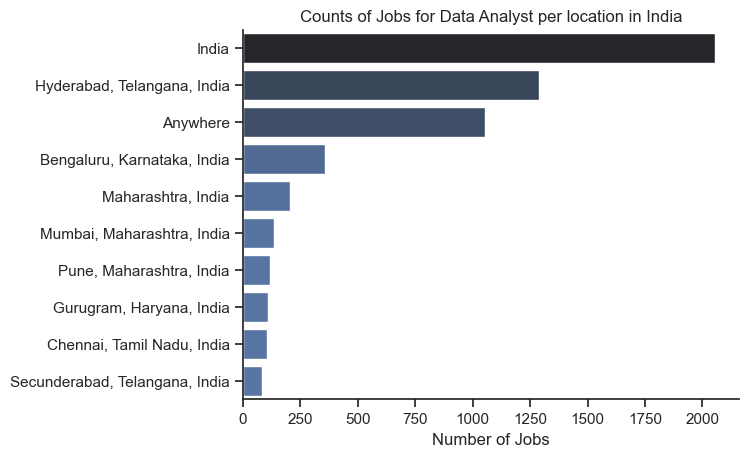

In [17]:
df_plot = df_DA_In['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Jobs for Data Analyst per location in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

['False', 'True']
['False', 'True']
['False']


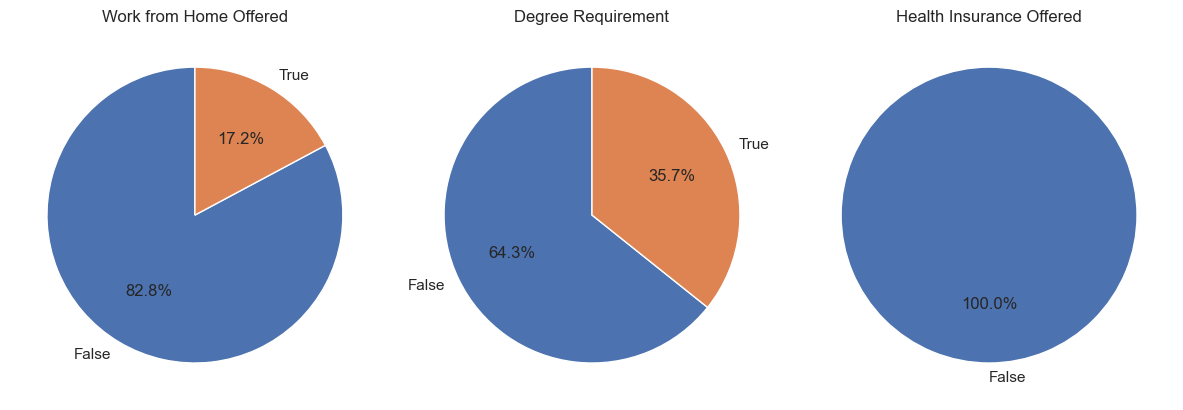

In [ ]:

dict_columns = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_columns.items()):
    # Drop NaN values for that column
    value_counts = df_DA_In[column].dropna().value_counts().sort_index()

    # Dynamically set labels based on available values
    labels = value_counts.index.map(str).tolist()
    
    ax[i].pie(value_counts, labels=labels, autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.tight_layout()
plt.show()

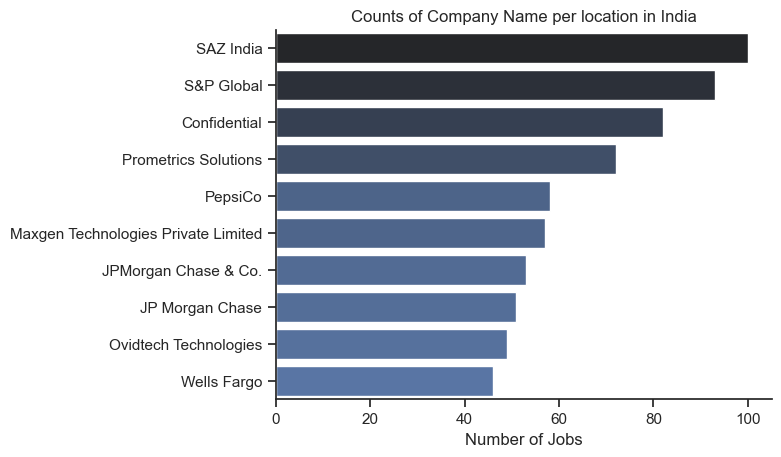

In [27]:
df_plot = df_DA_In['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Company Name per location in India')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()